In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv('Train (4).csv')
# df = df.fillna(0)
df


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [11]:
df_ = df.copy() 

# df_ = df_[df_['LotArea']]
# df_

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


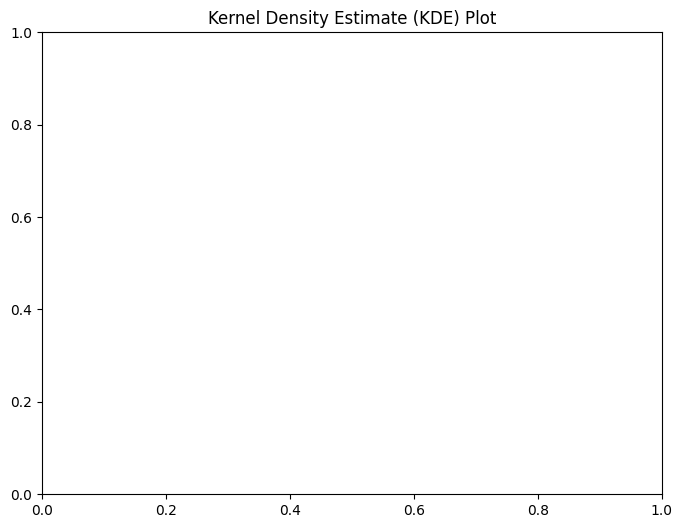

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Example data

# Create a KDE plot using seaborn
plt.figure(figsize=(8, 6))
plt.title('Kernel Density Estimate (KDE) Plot')


# Show the plot
plt.show()


In [18]:
# plt.scatter(df_['SalePrice'], label='Original Data')

In [17]:
mean_SalePrice = df_.groupby('SalePrice')['LotArea'].mean().reset_index()
mean_SalePrice

KeyError: 'SalePrice'

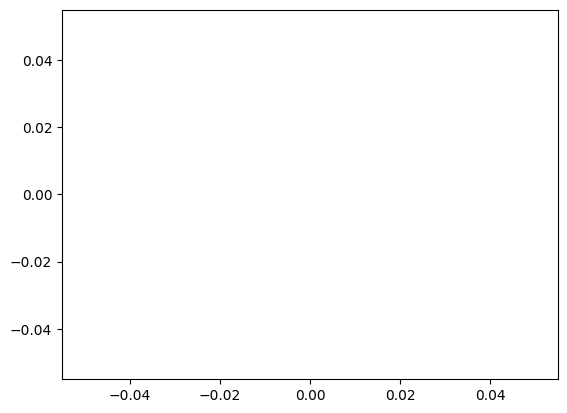

In [ ]:
plt.scatter(df_['SalePrice'], df_['LotFrontage'], label='Original Data')

In [ ]:
df_merged = pd.merge(df, mean_SalePrice, on='LotArea', how='left', suffixes=('', '_mean'))
df_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_mean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,NaN
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,NaN
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,NaN
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,NaN


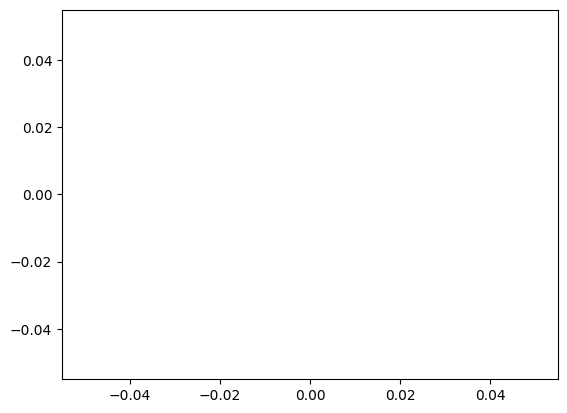

In [ ]:
plt.scatter(mean_SalePrice['LotArea'], mean_SalePrice['SalePrice'], label='Original Data')

In [ ]:
df_1 = df_merged[df_merged['SalePrice']<400000]
x =df_1[['SalePrice_mean','LotArea','LotFrontage','YrSold','MoSold','MSZoning','MSSubClass','Alley','LotShape','LandContour','Fence','MiscVal','SaleType','SaleCondition']]
y =df_1[['SalePrice']]

In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
# y = df[df['SalePrice']<400000][['SalePrice']]
x['LotFrontage'].nunique()

109

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# 

In [ ]:
x['LotFrontage'], x['LotShape'], x['LandContour'], \
    x['MSZoning'], x['SaleType'], x['SaleCondition'], x['Fence'], \
         x['Alley'] = label_encoder.fit_transform(x['LotFrontage']),\
label_encoder.fit_transform(x['LotShape']),\
label_encoder.fit_transform(x['LandContour']),\
label_encoder.fit_transform(x['MSZoning']),\
label_encoder.fit_transform(x['SaleType']),\
label_encoder.fit_transform(x['SaleCondition']),\
label_encoder.fit_transform(x['Fence']),\
label_encoder.fit_transform(x['Alley'])


/var/folders/kt/w7pxhthd1jb_m7n_v0x01k8c0000gn/T/ipykernel_33692/551639764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['LotFrontage'], x['LotShape'], x['LandContour'], \
/var/folders/kt/w7pxhthd1jb_m7n_v0x01k8c0000gn/T/ipykernel_33692/551639764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['MSZoning'], x['SaleType'], x['SaleCondition'], x['Fence'], \
/var/folders/kt/w7pxhthd1jb_m7n_v0x01k8c0000gn/T/ipykernel_33692/551639764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalePrice_mean  0 non-null      float64
 1   LotArea         1432 non-null   int64  
 2   LotFrontage     1432 non-null   int64  
 3   YrSold          1432 non-null   int64  
 4   MoSold          1432 non-null   int64  
 5   MSZoning        1432 non-null   int64  
 6   MSSubClass      1432 non-null   int64  
 7   Alley           1432 non-null   int64  
 8   LotShape        1432 non-null   int64  
 9   LandContour     1432 non-null   int64  
 10  Fence           1432 non-null   int64  
 11  MiscVal         1432 non-null   int64  
 12  SaleType        1432 non-null   int64  
 13  SaleCondition   1432 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 167.8 KB


In [ ]:
x.reindex()

,SalePrice_mean,LotArea,LotFrontage,YrSold,MoSold,MSZoning,MSSubClass,Alley,LotShape,LandContour,Fence,MiscVal,SaleType,SaleCondition
0,NaN,8450,36,2008,2,3,60,2,3,3,4,0,8,4
1,NaN,9600,51,2007,5,3,20,2,3,3,4,0,8,4
2,NaN,11250,39,2008,9,3,60,2,0,3,4,0,8,4
3,NaN,9550,31,2006,2,3,70,2,0,3,4,0,8,0
4,NaN,14260,55,2008,12,3,60,2,0,3,4,0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,7917,33,2007,8,3,60,2,3,3,4,0,8,4
1456,NaN,13175,56,2010,2,3,20,2,3,3,2,0,8,4
1457,NaN,9042,37,2010,5,3,70,2,3,3,0,2500,8,4
1458,NaN,9717,39,2010,4,3,20,2,3,3,4,0,8,4


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
#model.fit(X_train, y_train)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.fillna(0),y, test_size=0.2, random_state=32)

NameError: name 'x' is not defined

In [ ]:
# !pip install catboost

In [ ]:

from catboost import CatBoostRegressor

#model = LinearRegression()
# Create a CatBoostRegressor model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.09, loss_function='RMSE')

# # # Fit the model to the training data
catboost_model.fit(x_train, y_train, verbose=10)

0:	learn: 63613.7399330	total: 59.2ms	remaining: 59.1s
10:	learn: 53233.7881433	total: 63.2ms	remaining: 5.68s
20:	learn: 48819.2176146	total: 66.8ms	remaining: 3.11s
30:	learn: 46312.4455517	total: 70.2ms	remaining: 2.19s
40:	learn: 44766.2732266	total: 73.5ms	remaining: 1.72s
50:	learn: 43587.8946154	total: 77.4ms	remaining: 1.44s
60:	learn: 42655.6769389	total: 80.8ms	remaining: 1.24s
70:	learn: 41794.3984593	total: 83.7ms	remaining: 1.09s
80:	learn: 40835.5646752	total: 88.2ms	remaining: 1s
90:	learn: 39825.9367573	total: 91.3ms	remaining: 912ms
100:	learn: 38896.5228295	total: 94.9ms	remaining: 845ms
110:	learn: 37976.8771095	total: 98.8ms	remaining: 791ms
120:	learn: 37167.9938308	total: 103ms	remaining: 747ms
130:	learn: 36542.6122757	total: 107ms	remaining: 709ms
140:	learn: 35909.5517331	total: 111ms	remaining: 678ms
150:	learn: 35220.0353009	total: 115ms	remaining: 646ms
160:	learn: 34541.7434299	total: 118ms	remaining: 616ms
170:	learn: 33871.1277147	total: 122ms	remaining: 

In [ ]:
#model.fit(x_train, y_train)


In [ ]:
# y_pred = model.predict(x_test)
y_pred = catboost_model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.5138092874251561


In [ ]:
rmse = (mean_squared_error(y_test, y_pred))**0.5
print(f'mean_squared_error: {rmse}')


mean_squared_error: 46967.88759114014


In [ ]:
feature_importances = catboost_model.feature_importances_


# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

           Feature  Importance
1          LotArea   24.084793
6       MSSubClass   18.549037
2      LotFrontage   17.977304
4           MoSold    9.266981
13   SaleCondition    7.595745
8         LotShape    5.599492
3           YrSold    4.757714
5         MSZoning    3.733160
10           Fence    3.482568
9      LandContour    2.168460
12        SaleType    1.300671
11         MiscVal    0.802944
7            Alley    0.681130
0   SalePrice_mean    0.000000


In [ ]:
import pandas as pd
df = pd.read_csv('Test copy.csv')
df

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed
